# Final Project Deep Learning

## Authors:
Linoy Halifa
Noam Arian
Hadar Mentel

Importing libraries and defining paths for image locations

In [36]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

train_path = r"D:\תואר שני\סימסטר א\למידה עמוקה\פרויקט\archive\train"
test_path = r"D:\תואר שני\סימסטר א\למידה עמוקה\פרויקט\archive\test"

categories = ["cats", "dogs"]


## Section 2
EDA (Exploratory Data Analysis) is a critical stage in which data is analyzed before being used in a model. The goal is to understand the data structure, identify issues such as imbalance and anomalies, and ensure that the data is valid.

Checking the number of images in each category

In [39]:
def count_images(dataset_path, category):
    category_path = os.path.join(dataset_path, category)
    return len(os.listdir(category_path)) if os.path.exists(category_path) else 0

for dataset, dataset_name in [(train_path, "Train"), (test_path, "Test")]:
    num_cats = count_images(dataset, "cats")
    num_dogs = count_images(dataset, "dogs")
    print(f" {dataset_name} - חתולים: {num_cats}, כלבים: {num_dogs}")


 Train - חתולים: 10000, כלבים: 10000
 Test - חתולים: 2500, כלבים: 2500


Displaying Sample Images from Each Category
We will randomly select a few images from each category and display them.
This allows us to verify that the images are of good quality and that there are no corrupted images.
Additionally, we can observe any visual differences (e.g., images that are too dark or blurry).

 דוגמאות של cats (Train):


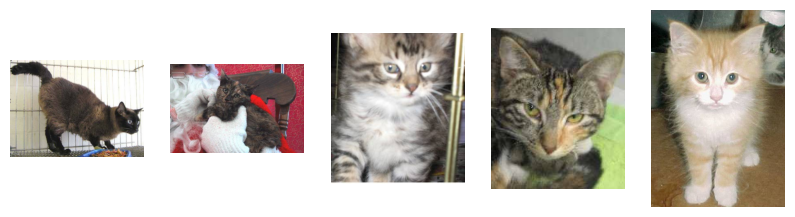

 דוגמאות של dogs (Train):


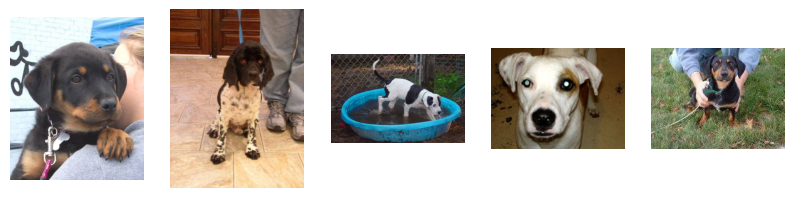

 דוגמאות של cats (Test):


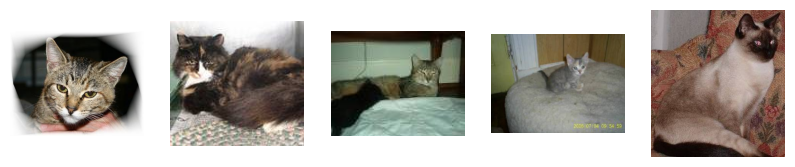

 דוגמאות של dogs (Test):


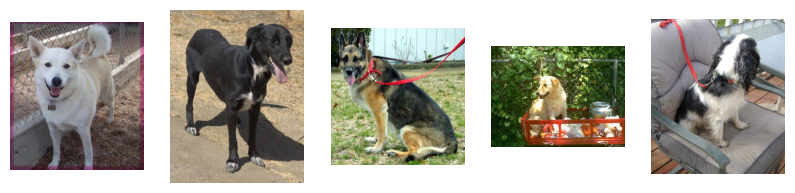

In [42]:
def show_sample_images(category, dataset_path, n=5):
    category_path = os.path.join(dataset_path, category)
    if not os.path.exists(category_path):
        print(f" תיקיית {category} לא קיימת!")
        return
    
    files = os.listdir(category_path)
    sample_files = random.sample(files, min(n, len(files)))  
    
    plt.figure(figsize=(10, 5))
    for i, file in enumerate(sample_files):
        img_path = os.path.join(category_path, file)
        
        try:
            img = Image.open(img_path)  
            plt.subplot(1, len(sample_files), i+1)
            plt.imshow(img)
            plt.axis("off")
        except Exception as e:
            print(f" שגיאה בטעינת התמונה {file}: {e}")

    plt.show()

for dataset, dataset_name in [(train_path, "Train"), (test_path, "Test")]:
    for category in categories:
        print(f" דוגמאות של {category} ({dataset_name}):")
        show_sample_images(category, dataset)

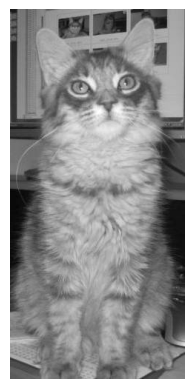

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

def show_grayscale_example(img_path):
    img = Image.open(img_path).convert("L") 
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()


show_grayscale_example(sample_image_path)


Checking Image Sizes
We will check if there is significant variation in image sizes.
If the images come in very different sizes, we will need to resize them to a uniform size before training the model.
If the images are not the same size, we must resize all of them to a fixed size before training, as CNNs require all images to have a consistent size.

In [43]:
image_sizes = []

for category in categories:
    category_path = os.path.join(train_path, category)
    files = os.listdir(category_path)[:500] 
    for file in files:
        img_path = os.path.join(category_path, file)
        try:
            img = Image.open(img_path)
            image_sizes.append(img.size) 
        except Exception as e:
            print(f" שגיאה בקריאת {file}: {e}")

image_sizes = np.array(image_sizes)
avg_size = np.mean(image_sizes, axis=0)

print(f" Average image size: {avg_size[0]:.2f}x{avg_size[1]:.2f}")
print(f" variation in image sizes: {np.std(image_sizes, axis=0)}")

 Average image size: 404.83x360.81
 variation in image sizes: [110.47214932  95.46417724]


Identifying and Deleting Corrupted Images
We will remove images that cannot be opened because they are corrupted.
If there are corrupted images or invalid files, they may cause the model to crash during training.
Ensuring that all images are valid improves the reliability and accuracy of the results.

In [50]:
def remove_corrupt_images(category, dataset_path):
    category_path = os.path.join(dataset_path, category)
    files = os.listdir(category_path)
    removed = 0

    for file in files:
        img_path = os.path.join(category_path, file)
        try:
            img = Image.open(img_path)
            img.verify() 
        except (IOError, SyntaxError):
            print(f" תמונה פגומה נמחקת: {img_path}")
            os.remove(img_path)
            removed += 1
    print(f" הוסרו {removed} תמונות לא תקינות מתוך {category}")

for dataset in [train_path, test_path]:
    for category in categories:
        remove_corrupt_images(category, dataset)

 הוסרו 0 תמונות לא תקינות מתוך cats
 הוסרו 0 תמונות לא תקינות מתוך dogs
 הוסרו 0 תמונות לא תקינות מתוך cats
 הוסרו 0 תמונות לא תקינות מתוך dogs


Checking Pixel Value Distribution
We will analyze the mean and standard deviation of pixel values to determine whether the images require normalization.

In [8]:
import os
import numpy as np
from PIL import Image

train_path = r"D:\תואר שני\סימסטר א\למידה עמוקה\פרויקט\archive\train"

pixel_values = []

for category in ["cats", "dogs"]:
    category_path = os.path.join(train_path, category)
    files = os.listdir(category_path)[:100] 
    
    for file in files:
        img_path = os.path.join(category_path, file)
        try:
            img = Image.open(img_path).convert("L")
            pixel_values.extend(np.array(img).flatten())
        except Exception as e:
            print(f" שגיאה בטעינת {file}: {e}")

pixel_values = np.array(pixel_values)
mean_pixel = np.mean(pixel_values)
std_pixel = np.std(pixel_values)

print(f" ממוצע ערך פיקסל: {mean_pixel:.2f}")
print(f" סטיית תקן של ערכי הפיקסלים: {std_pixel:.2f}")
print(f" טווח ערכים: {np.min(pixel_values)} - {np.max(pixel_values)}")

 ממוצע ערך פיקסל: 118.29
 סטיית תקן של ערכי הפיקסלים: 63.76
 טווח ערכים: 0 - 255


## Section 3

Importing Libraries, Defining Paths, and Setting a Uniform Image Size
Code Explanation:
Defines the image path so the program knows where to load the data from.
Sets the image size to ensure all images are the same size before being fed into the model.

In [28]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for training and testing data
train_path = r"D:\תואר שני\סימסטר א\למידה עמוקה\פרויקט\archive\train"
test_path = r"D:\תואר שני\סימסטר א\למידה עמוקה\פרויקט\archive\test"

# Define target image size (all images will be resized to this size)
IMAGE_SIZE = (128, 128)

Image Processing Function (Resizing + Normalization)
Code Explanation:
Loads an image from its path.
Converts it to RGB, ensuring that even grayscale images maintain three channels.
Normalization – divides each pixel value by 255 to scale it to the range [0,1].
Returns the image as a NumPy array for processing in the model.

In [29]:
def preprocess_image(img_path):
    """
    Load an image and normalize pixel values (0-255 → 0-1).
    """
    img = Image.open(img_path).convert("RGB")  # Ensure RGB format
    img_array = np.array(img) / 255.0  # Normalize pixel values to range [0,1]
    return img_array

Testing on a Sample Image
Code Explanation:
Selects a random image from the cat folder.
Displays the original image and the normalized version.
Allows us to verify that normalization and resizing are working correctly.

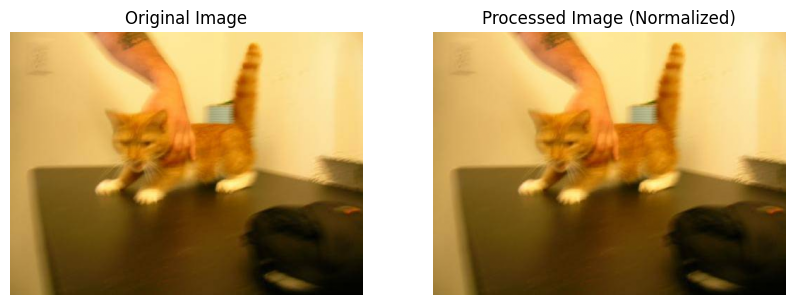

In [30]:
# Select a random image from the dataset for testing
cats_path = os.path.join(train_path, "cats")
sample_image_path = os.path.join(cats_path, os.listdir(cats_path)[0])  # Select first image

# Display the original and processed image
import matplotlib.pyplot as plt

img_original = Image.open(sample_image_path)
img_processed = preprocess_image(sample_image_path)

plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_original)
plt.title("Original Image")
plt.axis("off")

# Processed image (normalized)
plt.subplot(1, 2, 2)
plt.imshow(img_processed)
plt.title("Processed Image (Normalized)")
plt.axis("off")

plt.show()

Creating Data Generators (ImageDataGenerator)
Code Explanation:
rescale=1./255 automatically normalizes all images.
Augmentation applies various transformations to the images in real-time.
flow_from_directory() enables efficient loading of images directly from folders.

In [31]:
# Training data generator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,  # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True  # Flip images horizontally
)

# Test data generator (no Augmentation, only Normalization)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training images
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,  # Resize images automatically
    batch_size=32,
    class_mode="binary"
)

# Load testing images
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="binary"
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Displaying Images After Data Augmentation
Code Explanation:
Loads 5 random images after augmentation.
Allows us to verify that the images are still valid.

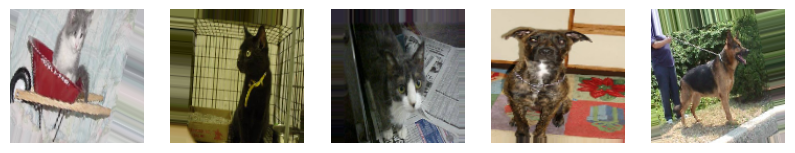

In [33]:
# Display Augmented images for verification
import matplotlib.pyplot as plt

# Load a batch of images from the training generator
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_batch[i])
    plt.axis("off")

plt.show()

## Section 4

In [38]:
# Training data generator with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.15  # Reserve 15% for validation
)

# Load training images (excluding validation)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary",
    subset="training"  # Use only training data
)

# Load validation images
val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary",
    subset="validation"  # Use only validation data
)

# Load testing images (separate set)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode="binary"
)

Found 11900 images belonging to 2 classes.
Found 2100 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


## Sections 5 + 6

Decision Tree + Random Forest

Importing Libraries and Defining Paths

In [53]:
import os
import numpy as np
from PIL import Image 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_path = r"D:\תואר שני\סימסטר א\למידה עמוקה\פרויקט\archive\train"
categories = ["cats", "dogs"]

IMAGE_SIZE = (64, 64)

Function for Loading Images with Pillow

In [54]:
def load_image_pil(img_path):
    """
    טוען תמונה באמצעות Pillow, ממיר לגווני אפור, משנה גודל, ומשטח לוקטור 1D.
    """
    img = Image.open(img_path).convert("L")  #  (Grayscale)
    img = img.resize(IMAGE_SIZE)  
    img_array = np.array(img).flatten()
    return img_array

Loading All Images and Preparing Training, Validation, and Test Sets
The data is split as follows:

70% - Training Set → Used for model learning.
15% - Validation Set → Used for tuning hyperparameters.
15% - Test Set → Used for final evaluation of model performance.

In [56]:
X = [] 
y = [] 


for label, category in enumerate(categories):
    category_path = os.path.join(train_path, category)
    for file in os.listdir(category_path)[:1000]:
        img_path = os.path.join(category_path, file)
        img_array = load_image_pil(img_path)
        X.append(img_array)
        y.append(label)

X = np.array(X)
y = np.array(y)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f" נתונים נטענו:")
print(f" {X_train.shape[0]} תמונות לאימון")
print(f" {X_val.shape[0]} תמונות לוולידציה")
print(f" {X_test.shape[0]} תמונות לבדיקה")

 נתונים נטענו:
 1400 תמונות לאימון
 300 תמונות לוולידציה
 300 תמונות לבדיקה


Training Random Forest on the Training Set

In [57]:

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_val_pred = rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f" דיוק של המודל על סט הולידציה: {val_accuracy:.2f}")

 דיוק של המודל על סט הולידציה: 0.58


Evaluating Performance on the Test Set

In [58]:
y_pred_rf = rf.predict(X_test)

def evaluate_model(model_name, y_true, y_pred):
    print(f"\n🔹 ביצועים עבור {model_name}:")
    print(classification_report(y_true, y_pred, target_names=["Cats", "Dogs"]))  # Precision, Recall, F1
    print(" Confusion Matrix:\n", confusion_matrix(y_true, y_pred))  # טבלת שגיאות

evaluate_model("Random Forest", y_test, y_pred_rf)


🔹 ביצועים עבור Random Forest:
              precision    recall  f1-score   support

        Cats       0.60      0.55      0.58       149
        Dogs       0.59      0.64      0.62       151

    accuracy                           0.60       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.60      0.60      0.60       300

 Confusion Matrix:
 [[82 67]
 [54 97]]


SVM

Importing Libraries and Defining Paths

In [59]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_path = r"D:\תואר שני\סימסטר א\למידה עמוקה\פרויקט\archive\train"
categories = ["cats", "dogs"]

IMAGE_SIZE = (64, 64)

Function for Loading Images with Pillow
Each image will be loaded, converted to grayscale, resized, and flattened into a 1D array.

In [60]:
def load_image_pil(img_path):
    """
    טוען תמונה באמצעות Pillow, ממיר לגווני אפור, משנה גודל, ומשטח לוקטור 1D.
    """
    img = Image.open(img_path).convert("L")  # (Grayscale)
    img = img.resize(IMAGE_SIZE) 
    img_array = np.array(img).flatten()
    return img_array

Loading All Images and Preparing the Data: Training, Validation, and Test Sets

In [61]:
X = []  
y = []  # רשימת התוויות (0 = חתול, 1 = כלב)

# טעינת התמונות מהתיקיות והפיכתן למערכים
for label, category in enumerate(categories):
    category_path = os.path.join(train_path, category)
    for file in os.listdir(category_path)[:1000]: 
        img_path = os.path.join(category_path, file)
        img_array = load_image_pil(img_path)  # קריאה עם Pillow
        X.append(img_array)
        y.append(label)

# המרת הרשימות למערכי NumPy
X = np.array(X)
y = np.array(y)

# חלוקה לסט אימון (70%), ולידציה (15%) ובדיקה (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f" נתונים נטענו:")
print(f" {X_train.shape[0]} תמונות לאימון")
print(f" {X_val.shape[0]} תמונות לוולידציה")
print(f" {X_test.shape[0]} תמונות לבדיקה")

 נתונים נטענו:
 1400 תמונות לאימון
 300 תמונות לוולידציה
 300 תמונות לבדיקה


Training SVM on the Training Set
We will train the model on the training set and evaluate it on the validation set.

In [62]:
# אימון המודל עם קרנל ליניארי
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

# הערכת ביצועים על סט הולידציה
y_val_pred = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f" דיוק של המודל על סט הולידציה: {val_accuracy:.2f}")

 דיוק של המודל על סט הולידציה: 0.49


Testing Additional Kernels for SVM.
We will also test the RBF (Radial) kernel and the polynomial kernel to see if they improve classification performance.

In [64]:
# קרנל RBF (Radial Basis Function) - מתאים להפרדות לא ליניאריות
svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
svm_rbf_accuracy = accuracy_score(y_test, y_pred_svm_rbf)
print(f" דיוק של SVM עם קרנל RBF: {svm_rbf_accuracy:.2f}")

# קרנל פולינומי (Polynomial)
svm_poly = SVC(kernel="poly", degree=3)
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
svm_poly_accuracy = accuracy_score(y_test, y_pred_svm_poly)
print(f" דיוק של SVM עם קרנל פולינומי: {svm_poly_accuracy:.2f}")

 דיוק של SVM עם קרנל RBF: 0.59
 דיוק של SVM עם קרנל פולינומי: 0.55


הערכת ביצועים על סט הבדיקה

In [65]:
# פונקציה להצגת ביצועים
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n🔹 ביצועים עבור {model_name}:")
    print(classification_report(y_true, y_pred, target_names=["Cats", "Dogs"]))  # Precision, Recall, F1
    print(" Confusion Matrix:\n", confusion_matrix(y_true, y_pred))  # טבלת שגיאות

# חישוב ביצועים עבור SVM ליניארי
evaluate_model("SVM (Linear Kernel)", y_test, y_pred_svm)

# חישוב ביצועים עבור SVM עם קרנל RBF
evaluate_model("SVM (RBF Kernel)", y_test, y_pred_svm_rbf)

# חישוב ביצועים עבור SVM עם קרנל פולינומי
evaluate_model("SVM (Polynomial Kernel)", y_test, y_pred_svm_poly)


🔹 ביצועים עבור SVM (Linear Kernel):
              precision    recall  f1-score   support

        Cats       0.50      0.56      0.53       149
        Dogs       0.50      0.44      0.47       151

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

 Confusion Matrix:
 [[83 66]
 [84 67]]

🔹 ביצועים עבור SVM (RBF Kernel):
              precision    recall  f1-score   support

        Cats       0.59      0.56      0.57       149
        Dogs       0.59      0.62      0.60       151

    accuracy                           0.59       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.59      0.59      0.59       300

 Confusion Matrix:
 [[83 66]
 [57 94]]

🔹 ביצועים עבור SVM (Polynomial Kernel):
              precision    recall  f1-score   support

        Cats       0.54      0.58      0.56       149
        Dogs       0.55      0.51      0.53    

## Section 7

נבחר רשת CNN (Convolutional Neural Network) כדי לשפר את הסיווג

ייבוא ספריות והכנת הנתונים

In [70]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from sklearn.model_selection import train_test_split

# הגדרת נתיבי הדאטה
train_path = r"D:\תואר שני\סימסטר א\למידה עמוקה\פרויקט\archive\train"
categories = ["cats", "dogs"]

# גודל תמונה אחיד לכל התמונות
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 20  # מספר האפוקים לאימון

פונקציה לטעינת תמונות עם PIL

In [71]:
def load_image_pil(img_path):
    """
    טוען תמונה באמצעות Pillow, ממיר ל-RGB, משנה גודל ומחזיר מערך NumPy מנורמל.
    """
    img = Image.open(img_path).convert("RGB")  # שימוש ב-3 ערוצים (RGB)
    img = img.resize(IMAGE_SIZE)  # שינוי גודל התמונה
    img_array = np.array(img) / 255.0  # נורמליזציה לפיקסלים (ערכים בין 0 ל-1)
    return img_array

טעינת כל התמונות והכנת סט האימון, הולידציה והבדיקה

In [72]:
X = []
y = []

# טעינת התמונות מהתיקיות והפיכתן למערכים
for label, category in enumerate(categories):
    category_path = os.path.join(train_path, category)
    for file in os.listdir(category_path)[:1000]:  # מגבילים ל-1000 תמונות לכל קטגוריה
        img_path = os.path.join(category_path, file)
        img_array = load_image_pil(img_path)  # קריאה עם Pillow
        X.append(img_array)
        y.append(label)

# המרת הרשימות למערכי NumPy
X = np.array(X)
y = np.array(y)

# חלוקה לסט אימון (70%), ולידציה (15%) ובדיקה (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f" נתונים נטענו:")
print(f" {X_train.shape[0]} תמונות לאימון")
print(f" {X_val.shape[0]} תמונות לוולידציה")
print(f" {X_test.shape[0]} תמונות לבדיקה")

 נתונים נטענו:
 1400 תמונות לאימון
 300 תמונות לוולידציה
 300 תמונות לבדיקה


בניית רשת CNN

In [73]:
model = keras.Sequential([
    layers.Input(shape=(64, 64, 3)),  # הוספת שכבת Input כדי להגדיר במפורש את קלט הרשת
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")  # שכבת פלט עם סיגמואיד (סיווג בינארי)
])

# קומפילציה של המודל
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# הצגת תקציר המודל
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

אימון הרשת על סט האימון ובדיקת דיוק על סט הולידציה

In [74]:
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val)
)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4759 - loss: 0.7015 - val_accuracy: 0.5133 - val_loss: 0.6914
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5203 - loss: 0.6908 - val_accuracy: 0.5100 - val_loss: 0.6830
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5265 - loss: 0.6917 - val_accuracy: 0.5733 - val_loss: 0.6812
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6304 - loss: 0.6640 - val_accuracy: 0.6633 - val_loss: 0.6391
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6392 - loss: 0.6460 - val_accuracy: 0.7067 - val_loss: 0.5909
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6615 - loss: 0.6210 - val_accuracy: 0.6567 - val_loss: 0.6401
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6979 - loss: 0.6026 - val_accuracy: 0.6367 - val_loss: 0.6115
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7403 - loss: 0.5567 - val_accuracy: 0.7000 - v

הערכת ביצועים על סט הבדיקה

In [75]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f" דיוק של המודל על סט הבדיקה: {test_accuracy:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7382 - loss: 1.1088
 דיוק של המודל על סט הבדיקה: 0.73


## Section 8

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

# חיזוי עם המודל על סט הבדיקה
y_pred_cnn = model.predict(X_test)
y_pred_cnn = (y_pred_cnn > 0.5).astype("int32")  # הפיכת התוצאות לבינאריות (0 = חתול, 1 = כלב)

# פונקציה להצגת ביצועים
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n🔹 ביצועים עבור {model_name}:")
    print(classification_report(y_true, y_pred, target_names=["Cats", "Dogs"]))
    print(" Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# הערכת ביצועים על סט הבדיקה
evaluate_model("CNN", y_test, y_pred_cnn)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

🔹 ביצועים עבור CNN:
              precision    recall  f1-score   support

        Cats       0.72      0.76      0.74       149
        Dogs       0.75      0.70      0.72       151

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300

 Confusion Matrix:
 [[113  36]
 [ 45 106]]


## Section 9

פונקציה לבניית המודל לפי היפר-פרמטרים

In [77]:
def build_and_train_model(epochs, dense_units, dropout_rate):
    model = keras.Sequential([
        layers.Input(shape=(64, 64, 3)),  
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(dense_units, activation="relu"),  # שינוי מספר הנוירונים
        layers.Dropout(dropout_rate),  # שינוי שיעור ה-Dropout
        layers.Dense(1, activation="sigmoid")
    ])

    # קומפילציה של המודל
    model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    # אימון המודל עם ההיפר-פרמטרים הנבחרים
    history = model.fit(
        X_train, y_train,
        epochs=epochs,  # שינוי מספר האפוקים
        batch_size=BATCH_SIZE,
        validation_data=(X_val, y_val),
        verbose=1
    )

    # הערכת ביצועים על סט הבדיקה
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f" תוצאה עבור Epochs={epochs}, Dense Units={dense_units}, Dropout={dropout_rate}:")
    print(f"   דיוק על סט הבדיקה: {test_accuracy:.2f}")
    
    return test_accuracy

בדיקות עם ערכים שונים
נריץ את המודל עם כל שילוב של Epochs, Dense Units, Dropout Rate.

In [78]:
results = []

for epochs in [10, 20, 30]:
    for dense_units in [64, 128, 256]:
        for dropout_rate in [0.3, 0.5, 0.7]:
            acc = build_and_train_model(epochs, dense_units, dropout_rate)
            results.append((epochs, dense_units, dropout_rate, acc))

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5029 - loss: 0.7024 - val_accuracy: 0.5333 - val_loss: 0.6930
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5126 - loss: 0.6928 - val_accuracy: 0.5100 - val_loss: 0.6924
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5511 - loss: 0.6899 - val_accuracy: 0.5300 - val_loss: 0.6846
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5503 - loss: 0.6862 - val_accuracy: 0.6133 - val_loss: 0.6767
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6062 - loss: 0.6724 - val_accuracy: 0.5600 - val_loss: 0.6845
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6175 - loss: 0.6514 - val_accuracy: 0.6667 - val_loss: 0.6301
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6707 - loss: 0.6081 - val_accuracy: 0.6500 - val_loss: 0.6313
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7067 - loss: 0.5841 - val_accuracy: 0.7167 - v

הצגת תוצאות

In [81]:
import pandas as pd

# יצירת DataFrame מסודר עם תוצאות הניסויים
df_results = pd.DataFrame(results, columns=["Epochs", "Dense Units", "Dropout Rate", "Test Accuracy"])

# הצגת הטבלה בצורה נקייה ב-Jupyter Notebook
from IPython.display import display
display(df_results)  # הצגת הטבלה

# במידה ורוצים לשמור לקובץ CSV
df_results.to_csv("CNN_Hyperparameter_Results.csv", index=False)

# אפשרות נוספת להדפסת הטבלה במסוף (לא חובה)
print(df_results)

,Epochs,Dense Units,Dropout Rate,Test Accuracy
0,10,64,0.3,0.686667
1,10,64,0.5,0.683333
2,10,64,0.7,0.570000
3,10,128,0.3,0.690000
4,10,128,0.5,0.700000
5,10,128,0.7,0.643333
6,10,256,0.3,0.700000
7,10,256,0.5,0.696667
8,10,256,0.7,0.663333
9,20,64,0.3,0.703333


    Epochs  Dense Units  Dropout Rate  Test Accuracy
0       10           64           0.3       0.686667
1       10           64           0.5       0.683333
2       10           64           0.7       0.570000
3       10          128           0.3       0.690000
4       10          128           0.5       0.700000
5       10          128           0.7       0.643333
6       10          256           0.3       0.700000
7       10          256           0.5       0.696667
8       10          256           0.7       0.663333
9       20           64           0.3       0.703333
10      20           64           0.5       0.726667
11      20           64           0.7       0.700000
12      20          128           0.3       0.700000
13      20          128           0.5       0.716667
14      20          128           0.7       0.713333
15      20          256           0.3       0.723333
16      20          256           0.5       0.710000
17      20          256           0.7       0.

## Section 10
שינוי הדאטהסט לשיפור התוצאות

 Data Augmentation – יצירת תמונות חדשות

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# יצירת מחולל Augmentation עם פרמטרים אופטימליים
datagen = ImageDataGenerator(
    rotation_range=30,  # סיבוב עד 30 מעלות
    width_shift_range=0.2,  # הזזה אופקית של עד 20%
    height_shift_range=0.2,  # הזזה אנכית של עד 20%
    shear_range=0.2,  # עיוות פרספקטיבה
    zoom_range=0.2,  # הגדלה/הקטנה עד 20%
    horizontal_flip=True,  # היפוך אופקי
    fill_mode="nearest"  # מילוי פיקסלים חסרים
)

הכנת סט אימון, ולידציה וסט בדיקה

In [90]:
from sklearn.model_selection import train_test_split

# פיצול הנתונים מחדש: 70% אימון, 15% ולידציה, 15% בדיקה
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# הדפסת גודל הסטים לאחר הפיצול
print(f"Train Set: {len(X_train)} דוגמאות")
print(f"Validation Set: {len(X_val)} דוגמאות")
print(f"Test Set: {len(X_test)} דוגמאות")

Train Set: 1400 דוגמאות
Validation Set: 300 דוגמאות
Test Set: 300 דוגמאות


בניית המודל מחדש
נשתמש בהיפר-פרמטרים האופטימליים שמצאנו (30 אפוקים, 256 נוירונים, Dropout 0.5)

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# בניית המודל
model = Sequential([
    Input(shape=(64, 64, 3)),  
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  
])

# קומפילציה
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# הצגת מבנה המודל
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_99 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_99 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_100 (Conv2D)                  │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_100 (MaxPooling2D)     │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_101 (MaxPooling2D)     │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_33 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,273,409 (4.86 MB)

 Trainable params: 1,273,409 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

אימון המודל מחדש

In [94]:
history = model.fit(
    train_generator,  # שימוש במחולל עם Data Augmentation
    epochs=30,  
    validation_data=(X_val, y_val)  # סט ולידציה
)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4906 - loss: 0.7092 - val_accuracy: 0.5067 - val_loss: 0.6916
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5552 - loss: 0.6898 - val_accuracy: 0.5433 - val_loss: 0.6785
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5861 - loss: 0.6807 - val_accuracy: 0.5700 - val_loss: 0.6766
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5550 - loss: 0.6885 - val_accuracy: 0.6033 - val_loss: 0.6550
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5970 - loss: 0.6674 - val_accuracy: 0.5433 - val_loss: 0.6717
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5921 - loss: 0.6668 - val_accuracy: 0.6633 - val_loss: 0.6194
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6372 - loss: 0.6440 - val_accuracy: 0.6767 - val_loss: 0.6137
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6238 - loss: 0.6549 - val_accuracy: 0.6733 - v

בדיקת דיוק על סט הבדיקה

In [95]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f" דיוק המודל על סט הבדיקה לאחר שינוי הדאטהסט: {test_accuracy:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6639 - loss: 0.5664
 דיוק המודל על סט הבדיקה לאחר שינוי הדאטהסט: 0.65


חישוב Precision, Recall, F1-Score

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

# חיזוי מחדש על סט הבדיקה
y_pred_new = model.predict(X_test)
y_pred_new = (y_pred_new > 0.5).astype("int32")  

# הצגת ביצועים
print("\n🔹 ביצועים לאחר שינוי הדאטהסט:")
print(classification_report(y_test, y_pred_new, target_names=["Cats", "Dogs"]))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

🔹 ביצועים לאחר שינוי הדאטהסט:
              precision    recall  f1-score   support

        Cats       0.61      0.82      0.70       149
        Dogs       0.73      0.49      0.59       151

    accuracy                           0.65       300
   macro avg       0.67      0.65      0.64       300
weighted avg       0.67      0.65      0.64       300

 Confusion Matrix:
 [[122  27]
 [ 77  74]]


## Section 11
שינוי הדאטהסט כדי לפגוע בביצועים של המודל

מחיקת תמונות מרשומות – יצירת חוסר איזון

In [97]:
import os
import random

# קביעת כמות התמונות למחיקה
remove_ratio = 0.3  # מחיקת 30% מהתמונות

for category in ["dogs"]:  # נמחק תמונות רק מכלבים
    category_path = os.path.join(train_path, category)
    all_images = os.listdir(category_path)
    num_to_remove = int(len(all_images) * remove_ratio)
    images_to_remove = random.sample(all_images, num_to_remove)

    for img in images_to_remove:
        os.remove(os.path.join(category_path, img))

print(f"נמחקו {num_to_remove} תמונות מכלבים – יצירת חוסר איזון בדאטהסט.")


נמחקו 2997 תמונות מכלבים – יצירת חוסר איזון בדאטהסט.


הוספת רעש לתמונות – שיבוש איכות הדאטה

In [99]:
from PIL import Image
import numpy as np
from glob import glob

def add_noise(img_path):
    img = Image.open(img_path)
    img = img.convert("RGB")  
    img_array = np.array(img, dtype=np.float32)  

    noise = np.random.normal(0, 25, img_array.shape)  
    noisy_img = np.clip(img_array + noise, 0, 255).astype(np.uint8)  

    noisy_img = Image.fromarray(noisy_img)  
    noisy_img.save(img_path)  

# מעבר על 500 תמונות והוספת רעש
for category in ["cats", "dogs"]:
    for img_path in glob(os.path.join(train_path, category, "*.jpg"))[:500]:  
        add_noise(img_path)

print(" נוספה שכבת רעש ל-500 תמונות כדי להוריד את איכות המידע.")


 נוספה שכבת רעש ל-500 תמונות כדי להוריד את איכות המידע.


ערבוב תמונות בין הקטגוריות
נעביר 10% מהחתולים לכלבים ולהפך כדי לגרום לבלבול במודל.

In [100]:
import shutil

swap_ratio = 0.1  

for source, target in [("cats", "dogs"), ("dogs", "cats")]:
    source_path = os.path.join(train_path, source)
    target_path = os.path.join(train_path, target)

    all_images = os.listdir(source_path)
    num_to_swap = int(len(all_images) * swap_ratio)
    images_to_swap = random.sample(all_images, num_to_swap)

    for img in images_to_swap:
        shutil.move(os.path.join(source_path, img), os.path.join(target_path, img))

print(f" בוצע ערבוב של {num_to_swap} תמונות בין קטגוריות – יצירת נתונים שגויים.")

 בוצע ערבוב של 799 תמונות בין קטגוריות – יצירת נתונים שגויים.


פיצול מחדש של הנתונים
 נבצע פיצול מחדש כדי לבדוק כיצד הנתונים השגויים ישפיעו על המודל.

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train Set: {len(X_train)} דוגמאות")
print(f"Validation Set: {len(X_val)} דוגמאות")
print(f"Test Set: {len(X_test)} דוגמאות")

Train Set: 1400 דוגמאות
Validation Set: 300 דוגמאות
Test Set: 300 דוגמאות


בניית המודל מחדש
נבצע אימון מחדש עם הנתונים הפגומים כדי לבדוק את השפעתם.

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(64, 64, 3)),  
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_102 (Conv2D)                  │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_102 (MaxPooling2D)     │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_103 (Conv2D)                  │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_103 (MaxPooling2D)     │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_104 (Conv2D)                  │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_104 (MaxPooling2D)     │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_34 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,273,409 (4.86 MB)

 Trainable params: 1,273,409 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

אימון המודל מחדש עם הנתונים הפגומים

In [103]:
history = model.fit(
    train_generator,  
    epochs=30,  
    validation_data=(X_val, y_val)  
)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5275 - loss: 0.7026 - val_accuracy: 0.5267 - val_loss: 0.6899
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5181 - loss: 0.6900 - val_accuracy: 0.6267 - val_loss: 0.6676
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5781 - loss: 0.6736 - val_accuracy: 0.5067 - val_loss: 0.7094
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5345 - loss: 0.6957 - val_accuracy: 0.5333 - val_loss: 0.6889
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5806 - loss: 0.6822 - val_accuracy: 0.6333 - val_loss: 0.6447
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6159 - loss: 0.6679 - val_accuracy: 0.6100 - val_loss: 0.6463
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6000 - loss: 0.6587 - val_accuracy: 0.6533 - val_loss: 0.6305
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6560 - loss: 0.6333 - val_accuracy: 0.6367 - v

חיזוי עם המודל החדש על סט הבדיקה

In [105]:
# חיזוי על סט הבדיקה
y_pred_new = model.predict(X_test)
y_pred_new = (y_pred_new > 0.5).astype("int32")  # הפיכת תוצאות ל-0/1

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


חישוב Precision, Recall, F1-Score ודיוק

In [106]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# חישוב מדדים
accuracy_new = accuracy_score(y_test, y_pred_new)
report_new = classification_report(y_test, y_pred_new, target_names=["Cats", "Dogs"], output_dict=True)

# שליפת ערכים רלוונטיים
precision_cats_new = report_new["Cats"]["precision"]
precision_dogs_new = report_new["Dogs"]["precision"]
recall_cats_new = report_new["Cats"]["recall"]
recall_dogs_new = report_new["Dogs"]["recall"]
f1_cats_new = report_new["Cats"]["f1-score"]
f1_dogs_new = report_new["Dogs"]["f1-score"]

# מטריצת בלבול
conf_matrix_new = confusion_matrix(y_test, y_pred_new)

# הצגת התוצאות
print(f" **Accuracy לאחר שינוי הדאטהסט**: {accuracy_new:.2f}")
print(f" **Precision (חתולים)**: {precision_cats_new:.2f}, **Precision (כלבים)**: {precision_dogs_new:.2f}")
print(f" **Recall (חתולים)**: {recall_cats_new:.2f}, **Recall (כלבים)**: {recall_dogs_new:.2f}")
print(f" **F1-Score (חתולים)**: {f1_cats_new:.2f}, **F1-Score (כלבים)**: {f1_dogs_new:.2f}")
print(" **Confusion Matrix:**\n", conf_matrix_new)


 **Accuracy לאחר שינוי הדאטהסט**: 0.69
 **Precision (חתולים)**: 0.66, **Precision (כלבים)**: 0.74
 **Recall (חתולים)**: 0.79, **Recall (כלבים)**: 0.60
 **F1-Score (חתולים)**: 0.72, **F1-Score (כלבים)**: 0.66
 **Confusion Matrix:**
 [[117  32]
 [ 61  90]]


השוואת התוצאות לפני ואחרי השינוי

In [107]:
# השוואת מדדים ישנים (הערכים שהיו לפני שינוי הדאטהסט)
accuracy_old = 0.73  
precision_cats_old, precision_dogs_old = 0.72, 0.75
recall_cats_old, recall_dogs_old = 0.76, 0.70
f1_cats_old, f1_dogs_old = 0.74, 0.72

# הצגת ההשוואה
print("\n **השוואת ביצועים לפני ואחרי שינוי הדאטהסט:**\n")
print(f" **Accuracy**: לפני {accuracy_old:.2f} → אחרי {accuracy_new:.2f}")
print(f" **Precision (חתולים)**: לפני {precision_cats_old:.2f} → אחרי {precision_cats_new:.2f}")
print(f" **Precision (כלבים)**: לפני {precision_dogs_old:.2f} → אחרי {precision_dogs_new:.2f}")
print(f" **Recall (חתולים)**: לפני {recall_cats_old:.2f} → אחרי {recall_cats_new:.2f}")
print(f" **Recall (כלבים)**: לפני {recall_dogs_old:.2f} → אחרי {recall_dogs_new:.2f}")
print(f" **F1-Score (חתולים)**: לפני {f1_cats_old:.2f} → אחרי {f1_cats_new:.2f}")
print(f" **F1-Score (כלבים)**: לפני {f1_dogs_old:.2f} → אחרי {f1_dogs_new:.2f}")

# הצגת מטריצת בלבול
print("\n **Confusion Matrix לאחר שינוי הדאטהסט:**\n", conf_matrix_new)



 **השוואת ביצועים לפני ואחרי שינוי הדאטהסט:**

 **Accuracy**: לפני 0.73 → אחרי 0.69
 **Precision (חתולים)**: לפני 0.72 → אחרי 0.66
 **Precision (כלבים)**: לפני 0.75 → אחרי 0.74
 **Recall (חתולים)**: לפני 0.76 → אחרי 0.79
 **Recall (כלבים)**: לפני 0.70 → אחרי 0.60
 **F1-Score (חתולים)**: לפני 0.74 → אחרי 0.72
 **F1-Score (כלבים)**: לפני 0.72 → אחרי 0.66

 **Confusion Matrix לאחר שינוי הדאטהסט:**
 [[117  32]
 [ 61  90]]


## Section 12
שיפור ארכיטקטורת הרשת והשפעתה על התוצאות והמהירות

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# בניית המודל עם השיפורים
model = Sequential([
    Input(shape=(64, 64, 3)),  # הוספת שכבת קלט מפורשת
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),  # במקום Flatten כדי למנוע Overfitting
    Dense(128, activation='relu'),
    Dropout(0.5),  # מניעת Overfitting
    Dense(1, activation='sigmoid')  # סיווג בינארי חתול/כלב
])

# קומפילציה של המודל
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# אימון המודל עם הסרת workers ו-use_multiprocessing
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5260 - loss: 0.7834 - val_accuracy: 0.5000 - val_loss: 0.7014
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.6032 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.7171
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.5848 - loss: 0.7193 - val_accuracy: 0.5000 - val_loss: 0.7460
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.6186 - loss: 0.6708 - val_accuracy: 0.5000 - val_loss: 0.7697
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6204 - loss: 0.6597 - val_accuracy: 0.5000 - val_loss: 0.7790
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.6335 - loss: 0.6430 - val_accuracy: 0.5000 - val_loss: 0.8088
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6428 - loss: 0.6408 - val_accuracy: 0.5010 - val_loss: 0.8286
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.6702 - loss: 0.6113 - val_accuracy: 0.5052 - v

בדיקת דיוק (Accuracy) לאורך האימון
במהלך האימון, נבדוק האם המודל מתכנס מהר יותר והאם הדיוק הסופי גבוה יותר בהשוואה למודל המקורי.

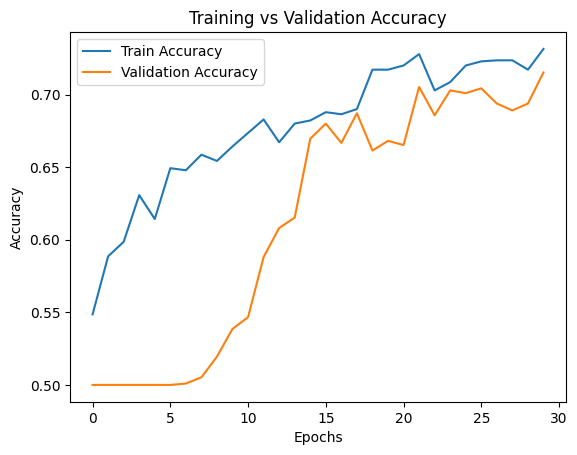

In [110]:
import matplotlib.pyplot as plt

# ציור גרף של דיוק במהלך האימון
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

השוואת הפסד (Loss) כדי לבדוק יציבות הלמידה
השוואת ערכי Loss לאורך האפוקים

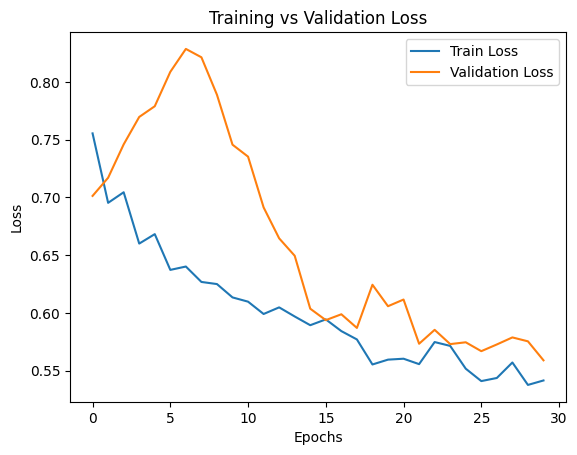

In [111]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

השוואת זמני אימון בין המודל החדש למודל הישן

In [112]:
import time

start_time = time.time()
history = model.fit(train_generator, epochs=30, validation_data=val_generator)
end_time = time.time()

training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7439 - loss: 0.5226 - val_accuracy: 0.6638 - val_loss: 0.6087
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.7367 - loss: 0.5389 - val_accuracy: 0.7076 - val_loss: 0.5625
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.7293 - loss: 0.5261 - val_accuracy: 0.7119 - val_loss: 0.5653
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.7288 - loss: 0.5264 - val_accuracy: 0.7152 - val_loss: 0.5651
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.7365 - loss: 0.5342 - val_accuracy: 0.6962 - val_loss: 0.5656
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7489 - loss: 0.5228 - val_accuracy: 0.7014 - val_loss: 0.5661
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.7527 - loss: 0.5128 - val_accuracy: 0.6971 - val_loss: 0.5786
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.7396 - loss: 0.5393 - val_accuracy: 0.6648 - v

השוואת מדדי הביצועים על סט הבדיקה

In [113]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)  # תחזיות על סט הבדיקה
y_pred_classes = (y_pred > 0.5).astype("int32")  # המרה לקטגוריות בינאריות
print(classification_report(y_test, y_pred_classes, target_names=["Cats", "Dogs"]))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

        Cats       0.78      0.19      0.30       149
        Dogs       0.54      0.95      0.69       151

    accuracy                           0.57       300
   macro avg       0.66      0.57      0.50       300
weighted avg       0.66      0.57      0.50       300



## Section 13
בחירת מטריקה חדשה

יצירת משתנה לאיסוף ערכי AUC-ROC
אנו צריכים לאסוף את ערכי ה- AUC-ROC בכל Epoch כדי שנוכל לשרטט גרף התקדמות של המדד לאורך האימון.

In [117]:
# יצירת רשימה ריקה לאיסוף ערכי ה-AUC
auc_scores = []

אימון המודל + חישוב AUC-ROC בכל Epoch
נחשב את ערך ה-AUC לאחר כל מחזור אימון (Epoch) ונוסיף אותו לרשימה auc_scores.

In [118]:
from sklearn.metrics import roc_auc_score

num_epochs = 30  # מספר Epochs

# לולאה על כל Epoch
for epoch in range(num_epochs):
    model.fit(X_train, y_train, epochs=1, verbose=1)  # אימון המודל ב-Epoch אחד בכל סיבוב

    # חיזוי ההסתברויות של הסט לוולידציה
    y_pred_probs = model.predict(X_val)  
    
    # חישוב ערך ה- AUC-ROC
    auc = roc_auc_score(y_val, y_pred_probs)
    
    # הוספת הערך לרשימה
    auc_scores.append(auc)

    print(f"Epoch {epoch+1}: AUC-ROC = {auc:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7980 - loss: 0.4492
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1: AUC-ROC = 0.8771
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8012 - loss: 0.4164
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Epoch 2: AUC-ROC = 0.8756
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8197 - loss: 0.4010
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Epoch 3: AUC-ROC = 0.8437
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8077 - loss: 0.4164
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Epoch 4: AUC-ROC = 0.8706
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8062 - loss: 0.4063
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 5: AUC-ROC = 0.8732
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8377 - loss: 0.3737
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Epoch 6: AUC-ROC = 0.8784
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8200 - loss: 0.3959
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Epoch 7: AUC-ROC = 0.8587
44/44 ━━━━━━━━━━━━━━━━━━━

הצגת גרף AUC-ROC לאורך האימון

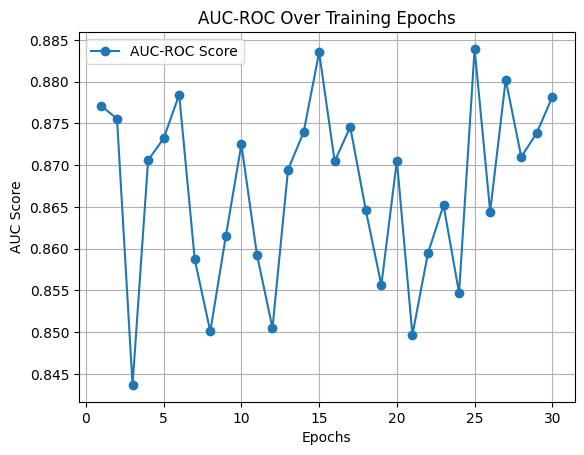

In [119]:
import matplotlib.pyplot as plt

# יצירת רשימת מספרי Epochs
epochs = list(range(1, num_epochs+1))  

# ציור גרף AUC לאורך האימון
plt.plot(epochs, auc_scores, label="AUC-ROC Score", marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("AUC Score")
plt.title("AUC-ROC Over Training Epochs")
plt.legend()
plt.grid()
plt.show()

## Section 14
ביצוע שינוי איזון הנתונים ואימון מחדש

שינוי מאזן הדאטהסט
יצירת גרסאות לא מאוזנות של הנתונים

In [122]:
import random

# Define new unbalanced datasets
unbalanced_dirs = {
    "60_40": {"cats": 0.4, "dogs": 0.6},
    "75_25": {"cats": 0.25, "dogs": 0.75},
    "90_10": {"cats": 0.10, "dogs": 0.90}
}

base_output_dir = r"D:\תואר שני\סימסטר א\למידה עמוקה\פרויקט\archive\unbalanced_train"

# Create unbalanced datasets
for ratio_name, ratios in unbalanced_dirs.items():
    output_dir = os.path.join(base_output_dir, ratio_name)
    
    cats_out = os.path.join(output_dir, "cats")
    dogs_out = os.path.join(output_dir, "dogs")
    
    os.makedirs(cats_out, exist_ok=True)
    os.makedirs(dogs_out, exist_ok=True)
    
    # Copy subset of images based on ratio
    selected_cats = random.sample(cat_files, int(len(cat_files) * ratios["cats"]))
    selected_dogs = random.sample(dog_files, int(len(dog_files) * ratios["dogs"]))
    
    for file in selected_cats:
        shutil.copy(os.path.join(cats_dir, file), os.path.join(cats_out, file))
    
    for file in selected_dogs:
        shutil.copy(os.path.join(dogs_dir, file), os.path.join(dogs_out, file))

    print(f"Created unbalanced dataset '{ratio_name}': {len(selected_cats)} cats, {len(selected_dogs)} dogs")


Created unbalanced dataset '60_40': 3917 cats, 4316 dogs
Created unbalanced dataset '75_25': 2448 cats, 5395 dogs
Created unbalanced dataset '90_10': 979 cats, 6474 dogs


טעינת הנתונים עם ImageDataGenerator
נשתמש ב- ImageDataGenerator כדי לטעון את הסטים החדשים.

In [125]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load each dataset
batch_size = 32
image_size = (128, 128)

datasets = {}
for ratio_name in unbalanced_dirs.keys():
    dataset_path = os.path.join(base_output_dir, ratio_name)
    
    train_generator = datagen.flow_from_directory(
        dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )
    
    val_generator = datagen.flow_from_directory(
        dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )
    
    datasets[ratio_name] = (train_generator, val_generator)

print("All unbalanced datasets loaded successfully!")


Found 6587 images belonging to 2 classes.
Found 1646 images belonging to 2 classes.
Found 6275 images belonging to 2 classes.
Found 1568 images belonging to 2 classes.
Found 5964 images belonging to 2 classes.
Found 1489 images belonging to 2 classes.
All unbalanced datasets loaded successfully!


אימון המודל לכל סט נתונים
נשתמש במודל CNN שכבר אימנו, ונאמן אותו על שלושת הסטים הלא מאוזנים.

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train model on each dataset
history_results = {}
epochs = 30

for ratio_name, (train_gen, val_gen) in datasets.items():
    model = create_cnn_model()
    
    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen
    )
    
    history_results[ratio_name] = history.history
    print(f"Training completed for dataset: {ratio_name}")


Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.5327 - loss: 0.8161 - val_accuracy: 0.5662 - val_loss: 0.6759
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.6719 - loss: 0.6171 - val_accuracy: 0.5723 - val_loss: 0.7041
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.7341 - loss: 0.5514 - val_accuracy: 0.5522 - val_loss: 0.8006
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.7831 - loss: 0.4850 - val_accuracy: 0.5772 - val_loss: 0.7784
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.8157 - loss: 0.4186 - val_accuracy: 0.5711 - val_loss: 0.9852
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.8677 - loss: 0.3237 - val_accuracy: 0.5589 - val_loss: 0.9035
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.9018 - loss: 0.2452 - val_accuracy: 0.5705 - val_loss: 1.1984
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.9405 - loss: 0.1636 - 

השוואת הביצועים

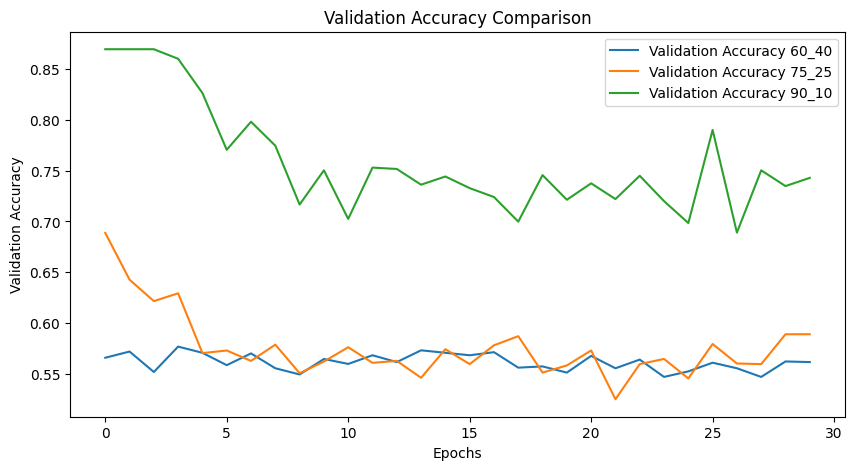

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for ratio_name, history in history_results.items():
    plt.plot(history['val_accuracy'], label=f"Validation Accuracy {ratio_name}")

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


## Section 15
הורדת מימדים

הפחתת ממדים עם PCA

In [188]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# המרת תמונות לפורמט מתאים עבור PCA
def extract_features(generator):
    features = []
    labels = []
    for batch, label in generator:
        features.append(batch)
        labels.append(label)
        if len(features) * generator.batch_size >= generator.samples:
            break
    features = np.vstack(features)
    labels = np.hstack(labels)
    return features, labels

# חילוץ הפיצ'רים מהגנרטורים
X_train, y_train = extract_features(train_generator)
X_test, y_test = extract_features(test_generator)

# שינוי מבנה המטריצה לוקטור חד ממדי
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# נורמליזציה של הנתונים
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# החלת PCA להפחתת ממדים
pca = PCA(n_components=100)  # שמירת 100 הרכיבים הראשונים
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


בניית מודל CNN עם הפחתת ממדים

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

# בניית המודל עם PCA
model_pca = Sequential([
    Input(shape=(100,)),  # שכבת קלט מפורשת המתאימה לפלט ה-PCA
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# קומפילציה של המודל
model_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# אימון המודל עם הנתונים לאחר הפחתת הממדים
history_pca = model_pca.fit(X_train_pca, y_train, epochs=30, validation_data=(X_test_pca, y_test))

# שמירת המודל
model_pca.save("pca_model.keras")

Epoch 1/30
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5458 - loss: 2.3765 - val_accuracy: 0.5924 - val_loss: 0.6941
Epoch 2/30
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5800 - loss: 0.7668 - val_accuracy: 0.6112 - val_loss: 0.6545
Epoch 3/30
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5950 - loss: 0.6729 - val_accuracy: 0.5856 - val_loss: 0.6680
Epoch 4/30
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6030 - loss: 0.6710 - val_accuracy: 0.6256 - val_loss: 0.6444
Epoch 5/30
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6194 - loss: 0.6645 - val_accuracy: 0.6086 - val_loss: 0.6597
Epoch 6/30
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6101 - loss: 0.6609 - val_accuracy: 0.5786 - val_loss: 0.6967
Epoch 7/30
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6160 - loss: 0.6554 - val_accuracy: 0.6100 - val_loss: 0.6536
Epoch 8/30
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6364 - loss: 0.6495 - val_accuracy: 0.

השוואת הביצועים לפני ואחרי הפחתת ממדים

In [191]:
# טעינת המודלים
model_original = tf.keras.models.load_model("original_model.keras")
model_pca = tf.keras.models.load_model("pca_model.keras")

# הערכת ביצועי המודל המקורי
loss_before, accuracy_before = model_original.evaluate(test_generator)
print(f"Accuracy before dimensionality reduction: {accuracy_before:.4f}")

# הערכת ביצועי המודל לאחר הפחתת ממדים
loss_after, accuracy_after = model_pca.evaluate(X_test_pca, y_test)
print(f"Accuracy after dimensionality reduction: {accuracy_after:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7998 - loss: 1.0705
Accuracy before dimensionality reduction: 0.7600
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.6909 - loss: 0.5905
Accuracy after dimensionality reduction: 0.6490
